In [17]:
import os
import yaml
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pprint import pprint

from mejiro.utils import util

# read configuration file
with open('roman_test.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [18]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '02')

pickles = sorted(glob(os.path.join(data_dir, '*', '*.pkl')))
lenses = [util.unpickle(f) for f in pickles]
print(f'Found {len(lenses)} system(s) in {data_dir}')

Found 25 system(s) in /data/bwedig/mejiro/roman_test_dev/02


In [19]:
sample_lens = lenses[0]

print(sample_lens)

StrongLens(name=roman_test_00000000, coords=None, z_lens=0.7429999999999994, z_source=1.3155071275197323)


In [20]:
main_halo_masses = [l.get_main_halo_mass() for l in lenses]
# np.save('main_halo_masses.npy', main_halo_masses)
np.save('main_halo_masses_slhammocks.npy', main_halo_masses)

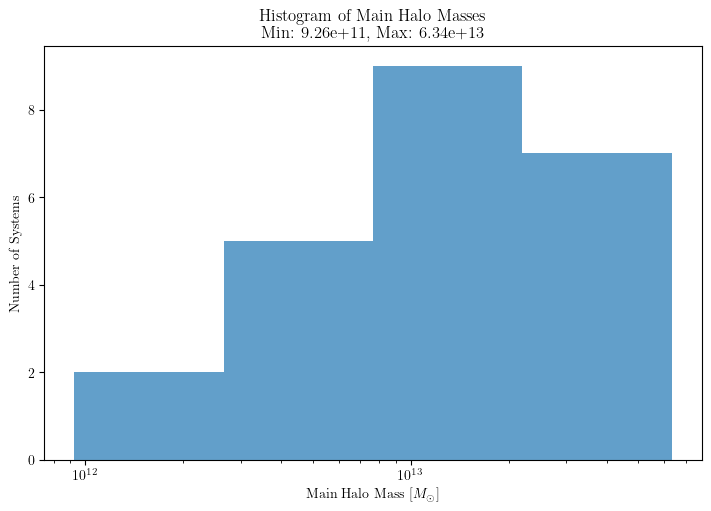

In [21]:
bins = np.logspace(np.log10(min(main_halo_masses)), np.log10(max(main_halo_masses)), int(np.sqrt(len(main_halo_masses))))
plt.hist(main_halo_masses, bins=bins, alpha=0.7)
plt.xscale('log')
plt.xlabel(r'Main Halo Mass [$M_\odot$]')
plt.ylabel('Number of Systems')
plt.title(f'Histogram of Main Halo Masses\nMin: {min(main_halo_masses):.2e}, Max: {max(main_halo_masses):.2e}')
plt.show()

In [5]:
# slsim = np.load('main_halo_masses.npy')
# slhammocks = np.load('main_halo_masses_slhammocks.npy')

# plt.hist(slsim, bins=30, alpha=0.5, label='SLSim')
# plt.hist(slhammocks, bins=30, alpha=0.5, label='SLHammocks')
# plt.xlabel('Main Halo Mass (M_sun)')
# plt.ylabel('Number of Systems')
# plt.legend()
# plt.show()